In [5]:
# Necessary Library
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling
import re
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')
import string
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score


from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV


plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [6]:
#load the data to dataframe
train = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Data_Test.xlsx")

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.6+ KB


In [8]:
train.describe(include ='all')

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,A Game of Thrones (A Song of Ice and Fire),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


In [9]:
test.describe(include ='all')

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,The Five Greatest Warriors (Jack West Series),Agatha Christie,"Paperback,– 2016",5.0 out of 5 stars,1 customer review,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [10]:
train.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

In [11]:
test.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory'],
      dtype='object')

In [12]:
df = pd.concat([train,test], axis = "index" )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [13]:
df.isnull().sum()

Author             0
BookCategory       0
Edition            0
Genre              0
Price           1560
Ratings            0
Reviews            0
Synopsis           0
Title              0
dtype: int64

In [14]:
test.duplicated().sum()

8

In [15]:
df.head()

,Author,BookCategory,Edition,Genre,Price,Ratings,Reviews,Synopsis,Title
0,Chris Kuzneski,Action & Adventure,"Paperback,– 10 Mar 2016",Action & Adventure (Books),220.00,8 customer reviews,4.0 out of 5 stars,THE HUNTERS return in their third brilliant no...,The Prisoner's Gold (The Hunters 3)
1,Arun Khopkar,"Biographies, Diaries & True Accounts","Paperback,– 7 Nov 2012",Cinema & Broadcast (Books),202.93,14 customer reviews,3.9 out of 5 stars,A layered portrait of a troubled genius for wh...,Guru Dutt: A Tragedy in Three Acts
2,Thomas Hobbes,Humour,"Paperback,– 25 Feb 1982",International Relations,299.00,6 customer reviews,4.8 out of 5 stars,"""During the time men live without a common Pow...",Leviathan (Penguin Classics)
3,Agatha Christie,"Crime, Thriller & Mystery","Paperback,– 5 Oct 2017",Contemporary Fiction (Books),180.00,13 customer reviews,4.1 out of 5 stars,A handful of grain is found in the pocket of a...,A Pocket Full of Rye (Miss Marple)
4,Editors of Life,"Arts, Film & Photography","Hardcover,– 10 Oct 2006",Photography Textbooks,965.62,1 customer review,5.0 out of 5 stars,"For seven decades, ""Life"" has been thrilling t...",LIFE 70 Years of Extraordinary Photography


In [16]:
df.corr()

,Price
Price,1.0


In [17]:
df["BookCategory"].nunique()

11

In [18]:
df["Author"].nunique()

4372

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 1559
Data columns (total 9 columns):
Author          7797 non-null object
BookCategory    7797 non-null object
Edition         7797 non-null object
Genre           7797 non-null object
Price           6237 non-null float64
Ratings         7797 non-null object
Reviews         7797 non-null object
Synopsis        7797 non-null object
Title           7797 non-null object
dtypes: float64(1), object(8)
memory usage: 609.1+ KB


In [20]:
df.describe(include='all')

,Author,BookCategory,Edition,Genre,Price,Ratings,Reviews,Synopsis,Title
count,7797,7797,7797,7797,6237.000000,7797,7797,7797,7797
unique,4372,11,3882,363,NaN,368,36,6771,6787
top,Agatha Christie,Action & Adventure,"Paperback,– 5 Oct 2017",Action & Adventure (Books),NaN,1 customer review,5.0 out of 5 stars,A Tinkle Double Digest is two Tinkle Digests i...,Complete Guide to Digital Photography
freq,87,1036,60,1183,NaN,1328,1751,8,4
mean,NaN,NaN,NaN,NaN,560.707516,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,690.110657,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,249.180000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,373.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,599.000000,NaN,NaN,NaN,NaN


In [21]:
df["BookCategory"].nunique()

11

In [22]:
df.isna().sum()

Author             0
BookCategory       0
Edition            0
Genre              0
Price           1560
Ratings            0
Reviews            0
Synopsis           0
Title              0
dtype: int64

In [23]:
df.head()

,Author,BookCategory,Edition,Genre,Price,Ratings,Reviews,Synopsis,Title
0,Chris Kuzneski,Action & Adventure,"Paperback,– 10 Mar 2016",Action & Adventure (Books),220.00,8 customer reviews,4.0 out of 5 stars,THE HUNTERS return in their third brilliant no...,The Prisoner's Gold (The Hunters 3)
1,Arun Khopkar,"Biographies, Diaries & True Accounts","Paperback,– 7 Nov 2012",Cinema & Broadcast (Books),202.93,14 customer reviews,3.9 out of 5 stars,A layered portrait of a troubled genius for wh...,Guru Dutt: A Tragedy in Three Acts
2,Thomas Hobbes,Humour,"Paperback,– 25 Feb 1982",International Relations,299.00,6 customer reviews,4.8 out of 5 stars,"""During the time men live without a common Pow...",Leviathan (Penguin Classics)
3,Agatha Christie,"Crime, Thriller & Mystery","Paperback,– 5 Oct 2017",Contemporary Fiction (Books),180.00,13 customer reviews,4.1 out of 5 stars,A handful of grain is found in the pocket of a...,A Pocket Full of Rye (Miss Marple)
4,Editors of Life,"Arts, Film & Photography","Hardcover,– 10 Oct 2006",Photography Textbooks,965.62,1 customer review,5.0 out of 5 stars,"For seven decades, ""Life"" has been thrilling t...",LIFE 70 Years of Extraordinary Photography


In [24]:
def no_of_occ(data):
    data = [i.split(",") for i in data]
    max = 1
    for i in data:
      if len(i) >= max:
        max = len(i)
    print("Max. number of data for a single boook = ",max)

### Splitting Synopsis

### Splitting Title

In [25]:
def split_Author(data):
    A1,A2,A3,A4,A5,A6,A7 = [],[],[],[],[],[],[]
    for i in data:
        try :
          A1.append(i.split(',')[0].strip().upper())
        except :
          A1.append('NONE')

        try :
          A2.append(i.split(',')[1].strip().upper())
        except :
          A2.append('NONE')

        try :
          A3.append(i.split(',')[2].strip().upper())
        except :
          A3.append('NONE')

        try :
          A4.append(i.split(',')[3].strip().upper())
        except :
          A4.append('NONE')

        try :
          A5.append(i.split(',')[4].strip().upper())
        except :
          A5.append('NONE')

        try :
          A6.append(i.split(',')[5].strip().upper())
        except :
          A6.append('NONE')

        try :
          A7.append(i.split(',')[6].strip().upper())
        except :
          A7.append('NONE')
    return A1,A2,A3,A4,A5,A6,A7


In [26]:
A1,A2,A3,A4,A5,A6,A7 = split_Author(df["Author"])

In [27]:
df.head()

,Author,BookCategory,Edition,Genre,Price,Ratings,Reviews,Synopsis,Title
0,Chris Kuzneski,Action & Adventure,"Paperback,– 10 Mar 2016",Action & Adventure (Books),220.00,8 customer reviews,4.0 out of 5 stars,THE HUNTERS return in their third brilliant no...,The Prisoner's Gold (The Hunters 3)
1,Arun Khopkar,"Biographies, Diaries & True Accounts","Paperback,– 7 Nov 2012",Cinema & Broadcast (Books),202.93,14 customer reviews,3.9 out of 5 stars,A layered portrait of a troubled genius for wh...,Guru Dutt: A Tragedy in Three Acts
2,Thomas Hobbes,Humour,"Paperback,– 25 Feb 1982",International Relations,299.00,6 customer reviews,4.8 out of 5 stars,"""During the time men live without a common Pow...",Leviathan (Penguin Classics)
3,Agatha Christie,"Crime, Thriller & Mystery","Paperback,– 5 Oct 2017",Contemporary Fiction (Books),180.00,13 customer reviews,4.1 out of 5 stars,A handful of grain is found in the pocket of a...,A Pocket Full of Rye (Miss Marple)
4,Editors of Life,"Arts, Film & Photography","Hardcover,– 10 Oct 2006",Photography Textbooks,965.62,1 customer review,5.0 out of 5 stars,"For seven decades, ""Life"" has been thrilling t...",LIFE 70 Years of Extraordinary Photography


## Spliting BookCategory

In [28]:
#Finding Max number of BookCategory in Single Book
no_of_occ(df["BookCategory"])

Max. number of data for a single boook =  2


In [29]:
def split_categories(data):
  
  cat = list(data)
  
  C1 = []
  C2 = []

  for i in cat: 
    try :
      C1.append(i.split(',')[0].strip().upper())
    except :
      C1.append('NONE')
      
    try :
      C2.append(i.split(',')[1].strip().upper())
    except :
      C2.append('NONE')
  return C1,C2

In [30]:
def split_edition(data):
    ed_type = [i.split(",– ")[0].strip().upper() for i in data]
    edit_date = [i.split(",– ")[1].strip() for i in data]
    m_y = [i.split()[-2:] for i in edit_date]

    for i in range(len(m_y)):
        if len(m_y[i]) == 1:
            m_y[i].insert(0,'NA')
    
    # Based on the given dataset below is the list of possible values for Months
    months =  ['Apr','Aug','Dec','Feb', 'Jan', 'Jul','Jun','Mar','May','NA','Nov','Oct','Sep']

    ed_month = [m_y[i][0].upper() if m_y[i][0] in months else 'NA' for i in range(len(m_y))]
    ed_year = [m_y[i][1].strip() if m_y[i][1].isdigit() else 0 for i in range(len(m_y))]
    return ed_type,ed_month,ed_year

## Split Genre

In [31]:
#Finding Max number of Genre in Single Book
no_of_occ(df["Genre"])

Max. number of data for a single boook =  2


In [32]:
def split_genre(data):
    genre1 = []
    genre2 = []    
    for i in data:    
        try :
          genre1.append(i.split(',')[0].strip().upper())
        except :
          genre1.append('NONE')

        try :
          genre2.append(i.split(',')[1].strip().upper())
        except :
          genre2.append('NONE')

    return genre1,genre2 

In [33]:
import re
#Cleaning the cloumns

a1,a2,a3,a4,a5,a6,a7 = split_Author(df["Author"])

b1,b2 = split_categories(df["BookCategory"])

ed_type,ed_month,ed_year = split_edition(df["Edition"])

gen1, gen2 = split_genre(df["Genre"])

rating= list(df["Ratings"])
rating_word = "customer reviews"
rating = [re.sub("customer reviews","",i) if rating_word in i else re.sub("customer review","",i) for i in rating]
rating = [int(re.sub(",","",i).strip()) for i in rating]

reviews = list(df["Reviews"])
reviews = [float(re.sub(" out of 5 stars","",i)) for i in reviews]

titles = list(df['Title'])
titles = [title.strip().upper() for title in titles]

price = list(df["Price"])
df["Edition_Type"]=ed_type
df["Edition_Month"]=ed_month
df["Edition_Year"]=ed_year
df["Category1"]=b1
df["Category2"]=b2
df["Genre1"]=gen1
df["Genre2"]=gen2
df["Reviews"]=reviews
df["Ratings"]=rating
df["Author1"]=a1
df["Author2"]=a2
df["Author3"]=a3
df["Author4"]=a4
df["Author5"]=a5
df["Author6"]=a6
df["Author7"]=a7

In [34]:
df.head()

,Author,BookCategory,Edition,Genre,Price,Ratings,Reviews,Synopsis,Title,Edition_Type,...,Category2,Genre1,Genre2,Author1,Author2,Author3,Author4,Author5,Author6,Author7
0,Chris Kuzneski,Action & Adventure,"Paperback,– 10 Mar 2016",Action & Adventure (Books),220.00,8,4.0,THE HUNTERS return in their third brilliant no...,The Prisoner's Gold (The Hunters 3),PAPERBACK,...,NONE,ACTION & ADVENTURE (BOOKS),NONE,CHRIS KUZNESKI,NONE,NONE,NONE,NONE,NONE,NONE
1,Arun Khopkar,"Biographies, Diaries & True Accounts","Paperback,– 7 Nov 2012",Cinema & Broadcast (Books),202.93,14,3.9,A layered portrait of a troubled genius for wh...,Guru Dutt: A Tragedy in Three Acts,PAPERBACK,...,DIARIES & TRUE ACCOUNTS,CINEMA & BROADCAST (BOOKS),NONE,ARUN KHOPKAR,NONE,NONE,NONE,NONE,NONE,NONE
2,Thomas Hobbes,Humour,"Paperback,– 25 Feb 1982",International Relations,299.00,6,4.8,"""During the time men live without a common Pow...",Leviathan (Penguin Classics),PAPERBACK,...,NONE,INTERNATIONAL RELATIONS,NONE,THOMAS HOBBES,NONE,NONE,NONE,NONE,NONE,NONE
3,Agatha Christie,"Crime, Thriller & Mystery","Paperback,– 5 Oct 2017",Contemporary Fiction (Books),180.00,13,4.1,A handful of grain is found in the pocket of a...,A Pocket Full of Rye (Miss Marple),PAPERBACK,...,THRILLER & MYSTERY,CONTEMPORARY FICTION (BOOKS),NONE,AGATHA CHRISTIE,NONE,NONE,NONE,NONE,NONE,NONE
4,Editors of Life,"Arts, Film & Photography","Hardcover,– 10 Oct 2006",Photography Textbooks,965.62,1,5.0,"For seven decades, ""Life"" has been thrilling t...",LIFE 70 Years of Extraordinary Photography,HARDCOVER,...,FILM & PHOTOGRAPHY,PHOTOGRAPHY TEXTBOOKS,NONE,EDITORS OF LIFE,NONE,NONE,NONE,NONE,NONE,NONE


In [35]:
df = df.drop(columns={'Author', 'BookCategory', 'Edition', 'Genre','Ratings','Reviews', 'Synopsis', 'Title'})

In [36]:
df["Edition_Type"].unique()

array(['PAPERBACK', 'HARDCOVER', 'MASS MARKET PAPERBACK', 'SHEET MUSIC',
       'FLEXIBOUND', 'PLASTIC COMB', 'LOOSE LEAF', 'TANKOBON SOFTCOVER',
       'PERFECT PAPERBACK', 'BOARD BOOK', 'CARDS', 'SPIRAL-BOUND',
       '(KANNADA),PAPERBACK', 'PRODUCT BUNDLE', 'LIBRARY BINDING',
       '(GERMAN),PAPERBACK', 'LEATHER BOUND', '(FRENCH),PAPERBACK',
       '(SPANISH),PAPERBACK', '(CHINESE),PAPERBACK'], dtype=object)

In [37]:
df["Edition_Type"].replace({'(KANNADA),PAPERBACK':'PAPERBACK', '(GERMAN),PAPERBACK':'PAPERBACK', '(FRENCH),PAPERBACK':'PAPERBACK',
                 '(SPANISH),PAPERBACK':"PAPERBACK", '(CHINESE),PAPERBACK':'PAPERBACK', 'PERFECT PAPERBACK':'PAPERBACK',
                 'MASS MARKET PAPERBACK':"PAPERBACK"}, inplace = True)

In [38]:
df["Edition_Type"].unique()

array(['PAPERBACK', 'HARDCOVER', 'SHEET MUSIC', 'FLEXIBOUND',
       'PLASTIC COMB', 'LOOSE LEAF', 'TANKOBON SOFTCOVER', 'BOARD BOOK',
       'CARDS', 'SPIRAL-BOUND', 'PRODUCT BUNDLE', 'LIBRARY BINDING',
       'LEATHER BOUND'], dtype=object)

In [39]:
df["Edition_Month"].str.match("NA").sum()

457

In [40]:
df["Edition_Month"]= df["Edition_Month"].replace("NA", df['Edition_Month'].mode()[0]) 

In [41]:
df["Edition_Month"].str.match("NA").sum()

0

In [42]:
df["Edition_Month"].unique()

array(['MAR', 'NOV', 'FEB', 'OCT', 'MAY', 'DEC', 'JAN', 'JUN', 'JUL',
       'SEP', 'AUG', 'APR'], dtype=object)

In [43]:
df["Edition_Month"].replace({'MAR':3, 'NOV':11, 'FEB':2, 'OCT':10, 'MAY':5, 'DEC':12, 'JAN':1, 'JUN':6, 'JUL':7,
       'SEP':9, 'AUG':8, 'APR':4}, inplace = True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 1559
Data columns (total 15 columns):
Price            6237 non-null float64
Edition_Type     7797 non-null object
Edition_Month    7797 non-null int64
Edition_Year     7797 non-null object
Category1        7797 non-null object
Category2        7797 non-null object
Genre1           7797 non-null object
Genre2           7797 non-null object
Author1          7797 non-null object
Author2          7797 non-null object
Author3          7797 non-null object
Author4          7797 non-null object
Author5          7797 non-null object
Author6          7797 non-null object
Author7          7797 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 974.6+ KB


In [45]:
df["Edition_Year"].unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', 0, '1997', '1995', '1987', '1986',
       '1990', '1988', '1981', '1976', '1994', '1998', '1977', '1974',
       '1983', '1971', '1985', '1978', '1964', '1984', '1980', '1979',
       '1960', '1970', '1975', '1905', '1900', '1961', '1925', '1973',
       '1942', '1972'], dtype=object)

In [46]:
df["Edition_Year"]= df["Edition_Year"].replace(0, df['Edition_Year'].mode()[0])

In [47]:
df["Edition_Year"].unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', '1997', '1995', '1987', '1986',
       '1990', '1988', '1981', '1976', '1994', '1998', '1977', '1974',
       '1983', '1971', '1985', '1978', '1964', '1984', '1980', '1979',
       '1960', '1970', '1975', '1905', '1900', '1961', '1925', '1973',
       '1942', '1972'], dtype=object)

In [48]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
# instantiate labelencoder object
le = LabelEncoder()

In [49]:
df['Author1'] = le.fit_transform(df['Author1'])
df['Author2'] = le.fit_transform(df['Author2'])
df['Author3'] = le.fit_transform(df['Author3'])
df['Author4'] = le.fit_transform(df['Author4'])
df['Author5'] = le.fit_transform(df['Author5'])
df['Author6'] = le.fit_transform(df['Author6'])
df['Author7'] = le.fit_transform(df['Author7'])


In [50]:
df.head()

,Price,Edition_Type,Edition_Month,Edition_Year,Category1,Category2,Genre1,Genre2,Author1,Author2,Author3,Author4,Author5,Author6,Author7
0,220.00,PAPERBACK,3,2016,ACTION & ADVENTURE,NONE,ACTION & ADVENTURE (BOOKS),NONE,731,196,55,17,6,1,1
1,202.93,PAPERBACK,11,2012,BIOGRAPHIES,DIARIES & TRUE ACCOUNTS,CINEMA & BROADCAST (BOOKS),NONE,359,196,55,17,6,1,1
2,299.00,PAPERBACK,2,1982,HUMOUR,NONE,INTERNATIONAL RELATIONS,NONE,3978,196,55,17,6,1,1
3,180.00,PAPERBACK,10,2017,CRIME,THRILLER & MYSTERY,CONTEMPORARY FICTION (BOOKS),NONE,69,196,55,17,6,1,1
4,965.62,HARDCOVER,10,2006,ARTS,FILM & PHOTOGRAPHY,PHOTOGRAPHY TEXTBOOKS,NONE,1113,196,55,17,6,1,1


In [51]:
cat_column = df.select_dtypes(exclude=np.number).columns

In [52]:
cat_column

Index(['Edition_Type', 'Edition_Year', 'Category1', 'Category2', 'Genre1',
       'Genre2'],
      dtype='object')

In [53]:
num_column = df.select_dtypes(include=np.number).columns

In [54]:
num_column

Index(['Price', 'Edition_Month', 'Author1', 'Author2', 'Author3', 'Author4',
       'Author5', 'Author6', 'Author7'],
      dtype='object')

In [55]:
df_cat_dummy = pd.get_dummies(df[cat_column])

In [56]:
df_preprocessed = pd.concat([df[num_column],df_cat_dummy],axis = "columns")

In [57]:
df_preprocessed.head()

,Price,Edition_Month,Author1,Author2,Author3,Author4,Author5,Author6,Author7,Edition_Type_BOARD BOOK,...,Genre2_NONE,Genre2_PERSECUTION & FUNDAMENTALISM,Genre2_PERSONAL & SOCIAL ISSUES (BOOKS),Genre2_SCIENCE FICTION & HORROR (BOOKS),Genre2_SNORKELLING & DIVING (BOOKS),Genre2_STRATEGY & MANAGEMENT (BOOKS),Genre2_TECHNOLOGY & MEDICINE (BOOKS),Genre2_THEORY & CRITICISM (BOOKS),Genre2_THRILLER & MYSTERY (BOOKS),Genre2_TOYS & ACTIVITIES (BOOKS)
0,220.00,3,731,196,55,17,6,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1,202.93,11,359,196,55,17,6,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,299.00,2,3978,196,55,17,6,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,180.00,10,69,196,55,17,6,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,965.62,10,1113,196,55,17,6,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [58]:
df.columns

Index(['Price', 'Edition_Type', 'Edition_Month', 'Edition_Year', 'Category1',
       'Category2', 'Genre1', 'Genre2', 'Author1', 'Author2', 'Author3',
       'Author4', 'Author5', 'Author6', 'Author7'],
      dtype='object')

In [59]:
test_df = df_preprocessed[df_preprocessed["Price"].isna()]

In [60]:
train_df = df_preprocessed[df_preprocessed["Price"].notna()]

In [61]:
test_df.shape

(1560, 487)

In [62]:
train_df.shape

(6237, 487)

## Machine Learning

In [63]:
y = train_df["Price"]

In [64]:
X = train_df.drop(columns="Price")

In [65]:
test_X = test_df.drop(columns="Price")

In [66]:
linear = LinearRegression()
linear.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
linear.coef_

array([-2.61129439e-01, -2.27046806e-03, -4.11984116e-01, -3.95759189e+00,
       -2.03571957e+01, -1.46555556e+02, -3.01619707e-09, -4.30161151e-09,
       -1.34993967e+03, -1.17314517e+03, -1.19216070e+03, -8.84689315e+02,
        2.98432884e+02, -1.34333373e+03, -1.57332782e+03, -1.37149581e+03,
       -4.32915729e+02,  1.23678315e+04, -1.11020806e+03, -1.12739519e+03,
       -1.10765318e+03,  3.90117528e+03,  3.67521832e+02,  1.24878988e+02,
       -4.91201035e-09,  2.01954767e+02, -2.08087892e+02, -8.59064379e+00,
       -2.25739393e+02, -1.80666839e+02, -3.04987608e+02,  6.66602773e-10,
       -3.09694478e+02, -1.53179031e+02, -1.32418116e+02,  9.37182777e+01,
        1.85852067e+03, -1.03283044e+02, -4.39564409e+02, -1.62905728e+02,
       -1.19932129e+02, -1.76581871e+02,  9.95093651e+01, -1.51016505e+02,
       -1.53008823e+02, -1.46186090e+02, -1.46383106e+02, -1.92750370e+02,
       -1.76987676e+02, -2.06738347e+02,  2.95537263e+02, -1.86222460e+02,
       -1.30344601e+02, -

In [108]:
linear.intercept_

3469.870721531408

In [109]:
np.sqrt(np.mean(np.abs(cross_val_score(linear,X,y,cv=20,scoring="neg_mean_squared_error"))))

3019791231.7154083

In [110]:
test_pred = linear.predict(test_X)

In [111]:
linear_result = pd.DataFrame(test_pred,columns= ["Price"])

In [112]:
linear_result.to_excel("linear.xlsx",index = False)

In [67]:
def model_fit(model, X, y, test, fileName ):
    model.fit(X,y)
    print("CrossValidation score = ",np.sqrt(np.mean(np.abs(cross_val_score(model,X,y,cv=20,scoring="neg_mean_squared_error")))))
    y_pred = model.predict(X)
    print("Train RMSE  :",np.sqrt(mean_squared_error(y,y_pred)))
    y_test_pred = model.predict(test)
    
    test_pred_df = pd.DataFrame(y_test_pred,columns= ["Price"])
    
    result = test_pred_df

    result.to_excel(fileName,index = False)

In [114]:
model_fit(linear, X, y, test_X, "model_solution.xlsx" )

CrossValidation score =  3019791231.7154083
Train RMSE  : 557.8688235167846


In [ ]:
pd.DataFrame(linear.coef_).plot(kind = "bar")

In [115]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
test_X_poly = poly_reg.fit_transform(test_X)

In [ ]:
model_fit(pol_reg, X_poly, y, test_X_poly, "model_poly_solution.xlsx" )

In [117]:
las = Lasso(alpha=10,normalize = True)

In [118]:
model_fit(las, X, y, test_X, "model_lasso_solution.xlsx" )

CrossValidation score =  690.1779338776915
Train RMSE  : 690.0553304334492


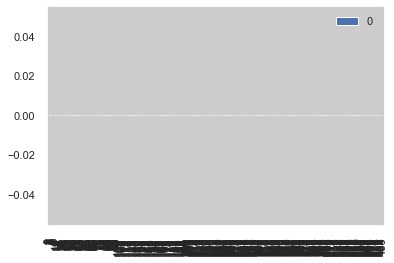

In [119]:
pd.DataFrame(las.coef_).plot(kind = "bar")

In [120]:
rid = Ridge(alpha=10,normalize = True)

In [121]:
model_fit(rid, X, y, test_X, "model_ridge_solution.xlsx" )

CrossValidation score =  667.9905195277255
Train RMSE  : 657.7323963721925


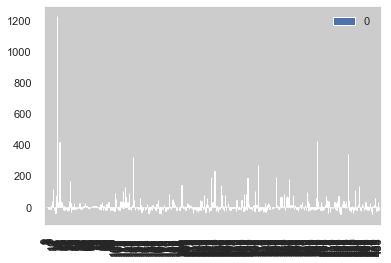

In [122]:
pd.DataFrame(rid.coef_).plot(kind = "bar")

In [123]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
clf = LassoCV(alphas=[1e-4,1e-3, 1e-2, 1e-1, 1, 10,11,23,100]).fit(X, y)
clf.score(X, y) 

C:\Users\mukeshkumar.selvan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209637841.68762887, tolerance: 245873.15240120146
  tol, rng, random, positive)
C:\Users\mukeshkumar.selvan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40242742.76174736, tolerance: 245873.15240120146
  tol, rng, random, positive)
C:\Users\mukeshkumar.selvan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16452642.778114557, tolerance: 238342.5729839574
  tol, rng, random, positive)
C:\Users\mukeshkumar.selvan\AppData\Roaming\Python\

0.24104958015075661

In [124]:
clf.alpha_

1.0

In [125]:
clf.alphas

[0.0001, 0.001, 0.01, 0.1, 1, 10, 11, 23, 100]

In [126]:
elastic = ElasticNet(alpha=0.4,l1_ratio=0.5)

In [127]:
model_fit(elastic, X, y, test_X, "model_elastic_solution.xlsx" )

CrossValidation score =  650.9491079531888
Train RMSE  : 648.7312643918542


In [1]:
# Validating the model
from xgboost.sklearn import XGBRegressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

In [ ]:
xgb_reg.fit(X, y)
predict = xgb_reg.predict(test_X)

sample['Purchase'] = predict
sample.to_csv('model_XGBOOST.csv', index=False)
model_fit(xgb_reg, X, y, test_X, "model_XGBOOST_solution.xlsx" )

In [68]:
model_fit(xgb_reg, X, y, test_X, "model_XGBOOST_solution.xlsx" )

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[16:05:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:06:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:06:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:07:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:08:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:08:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:09:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:09:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:10:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:10:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:11:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:11:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:12:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:12:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:13:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:13:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:14:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:15:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:15:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:16:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CrossValidation score =  666.3282133746213
Train RMSE  : 446.16729396805255


In [3]:
def model_fit(model, X, y, test, fileName ):
    model.fit(X,y)
    print("CrossValidation score = ",np.sqrt(np.mean(np.abs(cross_val_score(model,X,y,cv=20,scoring="neg_mean_squared_error")))))
    y_pred = model.predict(X)
    print("Train RMSE  :",np.sqrt(mean_squared_error(y,y_pred)))
    y_test_pred = model.predict(test)
    
    test_pred_df = pd.DataFrame(y_test_pred,columns= ["Price"])
    
    result = test_pred_df

    result.to_excel(fileName,index = False)